# T028 · Kinase similarity: Compare different perspectives

Authors:

- Talia B. Kimber, 2021, [Volkamer lab, Charité](https://volkamerlab.org/)
- Dominique Sydow, 2021, [Volkamer lab, Charité](https://volkamerlab.org/)
- Andrea Volkamer, 2021, [Volkamer lab, Charité](https://volkamerlab.org/)

## Aim of this talktorial

We will compare different perspectives on kinase similarity, which were discussed in detail in previous notebooks:

* **Talktorial T024**: Kinase pocket sequences (KLIFS pocket sequences)
* **Talktorial T025**: Kinase pocket structures (KiSSim fingerprint based on KLIFS pocket residues)
* **Talktorial T026**: Kinase-ligand interaction profiles (KLIFS IFPs based on KLIFS pocket residues)
* **Talktorial T027**: Ligand profiling data

### Contents in *Theory*

* Kinase dataset
* Kinase similarity descriptor (considering 4 different aspects)

### Contents in *Practical*

* Retrieve and preprocess data
* Show kinase coverage
* Compare kinases
* Visualize similarity as kinase matrix
* Visualize similarity as phylogenetic tree

### References

* Kinase dataset: [<i>Molecules</i> (2021), <b>26(3)</b>, 629](https://www.mdpi.com/1420-3049/26/3/629) 
* Kinase similarity descriptor: XXX

## Theory

### Kinase dataset

We will use nine kinases as investigated in [<i>Molecules</i> (2021), <b>26(3)</b>, 629](https://www.mdpi.com/1420-3049/26/3/629). In the study diverse kinase similarity measures were analyzed for different combinations of kinase on- and off-targets to explore the limits of multi-kinase screenings.

> We aggregated the investigated kinases in “profiles”. Profile 1 combined **EGFR** and **ErbB2** as targets and **BRAF** as a (general) anti-target. Out of similar considerations, Profile 2 consisted of EGFR and **PI3K** as targets and BRAF as anti-target. This profile is expected to be more challenging as PI3K is an atypical kinase and thus less similar to EGFR than for example ErbB2 used in Profile 1. Profile 3, comprised of EGFR and **VEGFR2** as targets and BRAF as anti-target, was contrasted with the hit rate that we found with a standard docking against the single target VEGFR2 (Profile 4).
> To broaden the comparison and obtain an estimate for the promiscuity of each compound, the kinases **CDK2**, **LCK**, **MET** and **p38α** were included in the experimental assay panel and the structure-based bioinformatics comparison as commonly used anti-targets.

*Table 1:*
Kinases used in this notebook, taken from [<i>Molecules</i> (2021), <b>26(3)</b>, 629](https://www.mdpi.com/1420-3049/26/3/629), with their synonyms, UniProt IDs, kinase groups, and full unabbreviated names.

| Kinase                     | Synonyms               | UniProt ID | Group    | Full kinase name                                 |
|----------------------------|------------------------|------------|----------|--------------------------------------------------|
| EGFR                       | ErbB1                  | P00533     | TK       | Epidermal growth factor receptor                 |
| ErbB2                      | Her2                   | P04626     | TK       | Erythroblastic leukemia viral oncogene homolog 2 |
| PI3K                       | PI3KCA, p110a          | P42336     | Atypical | Phosphatidylinositol-3-kinase                    |
| VEGFR2                     | KDR                    | P35968     | TK       | Vascular endothelial growth factor receptor 2    |
| BRAF                       | -                      | P15056     | TKL      | Rapidly accelerated fibrosarcoma isoform B       |
| CDK2                       | -                      | P24941     | CMGC     | Cyclic-dependent kinase 2                        |
| LCK                        | -                      | P06239     | TK       | Lymphocyte-specific protein tyrosine kinase      |
| MET                        | -                      | P08581     | TK       | Mesenchymal-epithelial transition factor         |
| p38a                       | MAPK14                 | Q16539     | CMGC     | p38 mitogen activated protein kinase α           |

### Kinase similarity descriptor (considering 4 different aspects)

Describe the dataset describing kinase similarity and how we use it.

- XXX = KLIFS pocket sequence
- XXX = KiSSim fingerprint
- XXX = KLIFS IFP
- XXX = Ligand promiscuity: ChEMBL28, bioactivity

## Practical

In [1]:
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import distance_matrix, distance
from scipy.cluster import hierarchy

In [2]:
HERE = Path(_dh[-1])
DATA = HERE / "data"

### Load kinase matrices

In [3]:
kinase_distance_matrix_paths = {
    "sequence": HERE / "../T024_kinase_similarity_sequence/data/kinase_distance_substitution_matrix_sequence.csv",
    # "sequence": HERE / "../T024_kinase_similarity_sequence/data/kinase_distance_identity_matrix_sequence.csv",
    #"sequence": HERE / "../T024_kinase_similarity_sequence/data/kinase_distance_matrix_sequence.csv",
    "kissim": HERE / "../T025_kinase_similarity_kissim/data/kinase_distance_matrix_kissim.csv",
    "ifp": HERE / "../T026_kinase_similarity_ifp/data/kinase_distance_matrix_ifp.csv",
    "ligand-profile": HERE / "../T027_kinase_similarity_ligand_profile/data/kinase_distance_matrix_ligand_profile.csv"
}

In [4]:
kinase_distance_matrices = {}
for kinsim_perspective, path in kinase_distance_matrix_paths.items():
    kinase_distance_matrices[kinsim_perspective] = pd.read_csv(path, index_col=0).round(6)

Check if the matrices have the same dimensions

In [5]:
for key in kinase_distance_matrix_paths.keys():
    print(f"Shape of {key} matrix: {kinase_distance_matrices[key].shape}")

Shape of sequence matrix: (9, 9)
Shape of kissim matrix: (9, 9)
Shape of ifp matrix: (9, 9)
Shape of ligand-profile matrix: (9, 9)


In [6]:
kinase_distance_matrices

{'sequence':                   EGFR     ErbB2     p110a       KDR      BRAF      CDK2  \
 kinase_klifs                                                               
 EGFR          0.000000  0.059037  0.572938  0.283953  0.344972  0.351553   
 ErbB2         0.059037  0.000000  0.586362  0.297882  0.345400  0.369692   
 p110a         0.572938  0.586362  0.000000  0.577295  0.563541  0.576006   
 KDR           0.283953  0.297882  0.577295  0.000000  0.328732  0.346621   
 BRAF          0.344972  0.345400  0.563541  0.328732  0.000000  0.353245   
 CDK2          0.351553  0.369692  0.576006  0.346621  0.353245  0.000000   
 LCK           0.288679  0.314925  0.548664  0.312352  0.327067  0.318747   
 MET           0.288742  0.302033  0.606301  0.286194  0.361842  0.343975   
 p38a          0.355356  0.364827  0.568806  0.346556  0.362088  0.276907   
 
                    LCK       MET      p38a  
 kinase_klifs                                
 EGFR          0.288679  0.288742  0.355356  
 

### Visualize similarity for example perspective

In [7]:
print(f"Choices of precalculated descriptors: {kinase_distance_matrix_paths.keys()}")

Choices of precalculated descriptors: dict_keys(['sequence', 'kissim', 'ifp', 'ligand-profile'])


In [8]:
descriptor_selection = "sequence"
kinase_distance_matrix = kinase_distance_matrices[descriptor_selection]

#### Visualize kinase matrix

We visualize the kinase matrix in the form of a heatmap.

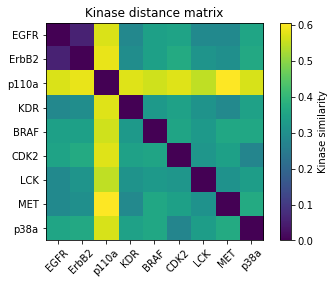

In [9]:
#plt.imshow(kinase_distance_matrix, vmin=0.0, vmax=1.0)
plt.imshow(kinase_distance_matrix)
plt.colorbar(label="Kinase similarity")
plt.title("Kinase distance matrix")
kinase_names = kinase_distance_matrix.columns.to_list()
plt.xticks(ticks=range(0, len(kinase_names)), labels=kinase_names, rotation=45)
plt.yticks(ticks=range(0, len(kinase_names)), labels=kinase_names);

#### Visualize similarity as dendrogram

We use the `scipy` function `squareform` to create a condensed vector of the distance matrix of shape $n*(n-1)/2$, where $n$ is the shape of the quadratic distance matrix. The values in this vector correspond to the values of the lower triangular matrix.

In [10]:
D = kinase_distance_matrix.values
D_condensed = distance.squareform(D)
D_condensed

array([0.059037, 0.572938, 0.283953, 0.344972, 0.351553, 0.288679,
       0.288742, 0.355356, 0.586362, 0.297882, 0.3454  , 0.369692,
       0.314925, 0.302033, 0.364827, 0.577295, 0.563541, 0.576006,
       0.548664, 0.606301, 0.568806, 0.328732, 0.346621, 0.312352,
       0.286194, 0.346556, 0.353245, 0.327067, 0.361842, 0.362088,
       0.318747, 0.343975, 0.276907, 0.309121, 0.337419, 0.370645])

We can submit this condensed vector to a hierarchical clustering to extract the relationship between the different kinases. We use here `method="average"`, which stands for the linkage method UPGMA (unweighted pair group method with arithmetic mean). This means that the distance between two clusters A and B is defined as the average of all distances between pairs of elements in clusters A and B. At each clustering step, the two clusters with the lowest average distance are combined.

In [11]:
hclust = hierarchy.linkage(D_condensed, method="average")

We now generate a phylogenetic tree based on our clustering.

In [12]:
tree = hierarchy.to_tree(hclust)

We visualize this tree as dendrogram.

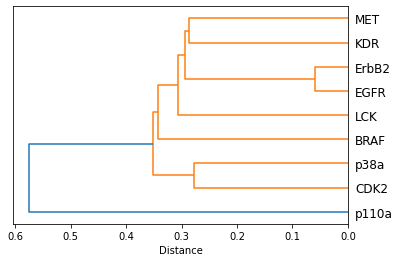

In [13]:
fig, ax = plt.subplots()
labels = kinase_distance_matrix.columns.to_list()
hierarchy.dendrogram(hclust, labels=labels, orientation="left", ax=ax)
ax.set_xlabel("Distance");

### Visualize similarities from different perspectives

#### Normalize different matrices [0,1]

#### Visualize stuff

In [14]:
def heatmap(distance_matrix, ax=None, title=""):
    """TODO"""
    #plt.imshow(kinase_distance_matrix, vmin=0.0, vmax=1.0)
    ax.imshow(distance_matrix)
    #ax.colorbar(label="Kinase similarity")
    ax.set_title(title)
    kinase_names = distance_matrix.columns.to_list()
    ax.set_xticks(ticks=range(0, len(kinase_names)))
    ax.set_xticklabels(labels=kinase_names, rotation=45)
    ax.set_yticks(ticks=range(0, len(kinase_names)))
    ax.set_yticklabels(labels=kinase_names)

In [15]:
def dendrogram(distance_matrix, ax=None, title=""):
    """TODO"""
    D = distance_matrix.values
    print(title)
    D_condensed = distance.squareform(D)
    hclust = hierarchy.linkage(D_condensed, method="average")
    tree = hierarchy.to_tree(hclust)
    labels = distance_matrix.columns.to_list()
    hierarchy.dendrogram(hclust, labels=labels, orientation="left", ax=ax)
    ax.set_title(title)
    ax.set_xlabel("Distance")

In [16]:
kinase_distance_matrices["kissim"]

,BRAF,CDK2,EGFR,ErbB2,KDR,LCK,MET,p110a,p38a
BRAF,0.000000,17.156339,19.515299,21.382788,21.089165,21.582682,20.297483,37.610863,21.731421
CDK2,17.156339,0.000000,18.146634,21.106349,19.880467,17.972925,18.304288,36.780071,19.480656
EGFR,19.515299,18.146634,0.000000,16.391994,17.281650,16.467225,17.498395,36.046207,22.127617
ErbB2,21.382788,21.106349,16.391994,0.000000,23.850592,23.880970,22.563236,41.277474,24.681708
KDR,21.089165,19.880467,17.281650,23.850592,0.000000,19.254898,20.430532,41.104455,20.262541
LCK,21.582682,17.972925,16.467225,23.880970,19.254898,0.000000,19.221161,39.022018,22.456693
MET,20.297483,18.304288,17.498395,22.563236,20.430532,19.221161,0.000000,39.414278,21.982655
p110a,37.610863,36.780071,36.046207,41.277474,41.104455,39.022018,39.414278,0.000000,38.529748
p38a,21.731421,19.480656,22.127617,24.681708,20.262541,22.456693,21.982655,38.529748,0.000000


27.09695
sequence
1751.566954
kissim
22.258792
ifp
52.39304
ligand-profile


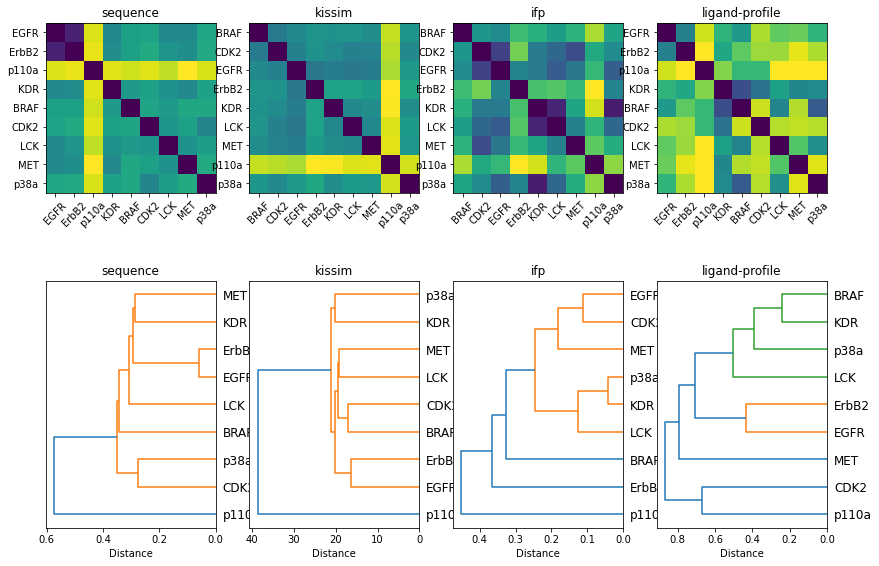

In [17]:
n_perspectives = len(kinase_distance_matrices)
fig, axes = plt.subplots(2, n_perspectives, figsize=(n_perspectives*3.5, 10))
for i, (perspective, matrix) in enumerate(kinase_distance_matrices.items()):
    print(matrix.sum().sum())
    heatmap(matrix, ax=axes[0][i], title=perspective)
    dendrogram(matrix, ax=axes[1][i], title=perspective)

## Discussion

Wrap up the talktorial's content here and discuss pros/cons and open questions/challenges.

## Quiz

Ask three questions that the user should be able to answer after doing this talktorial. Choose important take-aways from this talktorial for your questions.

1. Question
2. Question
3. Question